## Synthetic late-time light curves from Bateman equation

References:
* Seitenzahl et al (2009). http://dx.doi.org/10.1111/j.1365-2966.2009.15478.x
* Seitenzahl et al (2014). http://dx.doi.org/10.1088/0004-637X/792/1/10
* Graur et al (2016). https://arxiv.org/pdf/1505.00777v3.pdf

In [1]:
# Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def luminosity (A, mass_A, time, correction): 
    B = correction  # scaling factor - see eqn. 1, Graur et al, 2016

    if (A == 55):
        lambda_A = 6.916e-4  
        #q_A = 5.608 
        q_A = 3.973
    elif (A == 56):
        lambda_A = 8.975e-3 
        #q_A = 121.017
        q_A = 
    elif (A == 57): 
        lambda_A = 2.551e-3  
        q_A = 21.412  
    elif (A == 44):
        lambda_A = 3.222e-5  
        q_A = 11.351  
    else:
        print ('ERROR : isotope not defined.')
        sys.exit ()
        
    return 2.221 * (B / A) * lambda_A * mass_A * q_A * math.exp (-lambda_A * time) * 1.e43  

In [235]:
luminosity (56, 2.8E-2, 276, 0.33)

3.342893043659453e+38

In [165]:
# Input arrays of abundances and time, print plots of late-time light curves
def plotter11fe (times, mass_co56, mass_ti44_array):
    atom = [56, 57, 55]
    abundance_ti44 = mass_ti44_array

    abundances = [mass_co56, 0.019*mass_co56, 0.019*mass_co56*0.245]

    labels = ['$^{56}$Co = '+str(mass_co56)+' $M_{\odot}$','$^{57}$Co/$^{56}$Co = 0.019','$^{55}$Fe/$^{57}$Co = 0.245', None, None, None, None, None, None, None, None, None, None, None, None]
    lum_list = []
    lum44_list = []

    colors = ['brown', 'purple', 'orange', 'red','red', 'blue', 'blue', 'green', 'green',  'black', 'black', 'black', 'black', 'black', 'black']
    styles = ['-', '--', '-.', ':', ':',':', ':',':', ':', '-', '-', '-', '-','--', '--']
        
    for i, abundance in enumerate(abundances):
        lum_list.append([luminosity(atom[i], abundance, time, 0.33) for time in times])
    for k, abundance in enumerate(abundance_ti44):
        lum_list.append([luminosity(44, abundance, time, 0.33) for time in times])

    lum_list.append([sum(x) for x in zip(*lum_list[:4])])
    lum_list.append([sum(x) for x in zip(*(lum_list[:3] + lum_list[4:5]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:3] + lum_list[5:6]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:3] + lum_list[6:7]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:3] + lum_list[7:8]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:3] + lum_list[8:9]))])
    fig, ax = plt.subplots (1, figsize=(8, 6))
    
    for j in range(len(lum_list)):
        ax.plot(times, np.log10(lum_list[j]), label = labels[j], linewidth = 2, color=colors[j], linestyle=styles[j])

    y1 = np.array(np.log10(lum_list[4]))
    y2 = np.array(np.log10(lum_list[9]))
    y3 = np.array(np.log10(lum_list[6]))
    y4 = np.array(np.log10(lum_list[11]))
    y5 = np.array(np.log10(lum_list[8]))
    y6 = np.array(np.log10(lum_list[13]))
  
    ax.fill_between(times, y5, y6, where = y5 > y6, facecolor ='green', alpha = 0.6)
    ax.fill_between(times, y1, y2,  where = y1 > y2, facecolor ='lightcoral', alpha = 1.0)
    ax.fill_between(times, y3, y4, where = y3 > y4, facecolor ='blue', alpha = 0.4)
    
    plt.xlim( [times[0], times[-1]] )
    plt.ylim( [31.5, 39] )
    plt.xlabel ('Time (days)')
    plt.ylabel ('Log Pseudo-bolometric \n Luminosity (erg s$^{-1}$)')
    
    time_raw = [1124.0506329113923, 1303.2911392405063, 1402.0253164556962, 1622.2784810126582, 1841.0126582278485, 2103.797468354431, 2387.848101265822]
    lum_raw = [1.5254580453136004e+37, 6.844494289090541e+36, 5.533142912987552e+36, 2.8520290783750925e+36, 1.5927290487104443e+36, 1.1452552090052304e+36, 7.935940327400575e+35]
    
    #plt.title ('SN 2011fe Late-Time Luminosity')
    plt.scatter(time_raw, np.log10(lum_raw), c='black', marker= "*", label = "$L_\mathrm{bol}$ (Tucker 2021)")
    plt.text(12500, 34., 'DD mergers', fontsize = 14)
    plt.text(12700, 32.5, 'SD near-$M_\mathrm{Ch}$', fontsize = 14)
    plt.text(11500, 35, 'double detonation', fontsize = 14, color = "green")
    plt.rcParams.update ( {'font.size' : 13})
    plt.legend()#bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.show()
    plt.savefig('SN2011_fe_withcorrectionfactor.png', dpi = 1000)
    #plt.clf()

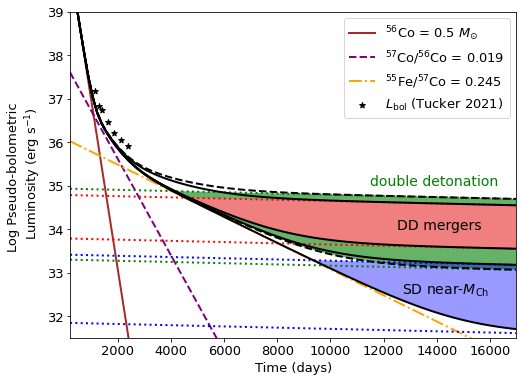

In [222]:
plotter11fe (np.linspace (200., 17000., 100), 0.5, [1.e-4, 1.e-3, 1.15e-6, 4.25e-5, 3.27e-5, 1.4e-3])

In [220]:
def plotter19ehk (times, mass_co56, mass_ti44_array):
    atom = [56]
    abundances = [mass_co56]
    abundance_ti44 = mass_ti44_array
    
    lum_list = []
    lum44_list = []

    colors = ['purple', 'brown','brown', 'black', 'black']
    styles = ['--', ':', ':', '-', '-']
        
    for i, abundance in enumerate(abundances):
        lum_list.append([luminosity(atom[i], abundance, time, 0.33) for time in times])
    for k, abundance in enumerate(abundance_ti44):
        lum_list.append([luminosity(44, abundance, time,  0.33) for time in times])

    lum_list.append([sum(x) for x in zip(*lum_list[:2])])
    lum_list.append([sum(x) for x in zip(*(lum_list[:2] + lum_list[2:3]))])
    
    labels = ['$^{56}\mathrm{Co}$','$^{44}\mathrm{Ti}$', None, None, None]
    
    fig, ax = plt.subplots (1)

    for l in range(len(lum_list)):
        ax.plot(times, np.log10(lum_list[l]), label = labels[l], linewidth = 2, color=colors[l], linestyle=styles[l])

    time_raw = [0.43,1.37,1.42,1.82,2.81,3.45,4.41,4.41,4.46,5.44,5.59,5.75,6.33,7.38,10.41,10.41,12.59,13.34,13.56,14.38,15.28,17.39,17.39,20.72,24.46,26.5,29.32,30.38,31.4,31.4,31.47,32.38,34.28,34.31,34.41,34.55,37.25,37.38,38.38,40.3,40.42,42.27,44.43,47.42,50.48,50.91,55.73,56.24,56.38,59.4,68.21,86.06,87.17,89.17,95.17,276.13,321.79,388.93]
    lum_raw = [1.83E+041,5.94E+041,6.1E+041,6.53E+041,7.76E+041,1.75E+042,1.27E+042,1.27E+042,1.22E+042,8.8E+041,8.33E+041,7.59E+041,5.91E+041,5.48E+041,6.86E+041,6.86E+041,7.63E+041,7.84E+041,8.03E+041,8.23E+041,7.54E+041,5.87E+041,5.87E+041,4.5E+041,3.49E+041,3.21E+041,2.81E+041,2.74E+041,2.72E+041,2.72E+041,2.66E+041,2.58E+041,2.45E+041,2.45E+041,2.44E+041,2.47E+041,2.17E+041,2.16E+041,2.1E+041,1.99E+041,2E+041,2.05E+041,1.95E+041,1.87E+041,1.7E+041,1.7E+041,1.52E+041,1.48E+041,1.46E+041,1.32E+041,9.83E+040,6.99E+040,6.64E+040,6.75E+040,5.39E+040,1.07E+039,4.76E+038,1.55E+038]
    
    print(len(time_raw), len(lum_raw))
    
    plt.scatter(time_raw, np.log10(lum_raw), c='black', marker= "*", label = "$L_\mathrm{bol}$ (Jacobson-Galan 2021)")
    #ax.fill_between(times, np.log10(lum_list[0]), np.log10(lum_list[1]), facecolor ='purple', alpha = 0.1)
    #ax.fill_between(times, np.log10(lum_list[2]), np.log10(lum_list[3]), facecolor ='brown', alpha = 0.1)
    plt.xlim( [times[0], times[-1]] )
    plt.ylim( [32.5, 42] )
    plt.xlabel ('Time (days)')
    plt.ylabel ('Log Pseudo-bolometric \n Luminosity (erg s$^{-1}$)')
    plt.rcParams.update ( {'font.size' : 13})
    plt.tight_layout()
    plt.legend()
    plt.savefig('SN2019ehk.png', dpi=1000)

58 58


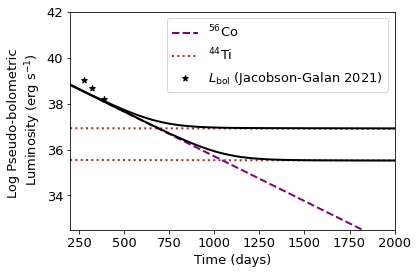

In [221]:
plotter19ehk (np.linspace (200., 2000., 100), 2.8e-2, [5.8e-3, 1.4e-1])

In [174]:
def teq(la, lb, ma, mb, qa, qb, a, b):
    return (1./(lb-la))*np.log((lb/la)*(mb/ma)*(qb/qa)*(a/b))

In [192]:
print(teq(0.3222e-4, 89.75e-4, 1.4e-1, 2.8e-2, 11.351, 121.017, 44, 56))
print(teq(0.3222e-4, 89.75e-4, 1.4e-1, 2.8e-2, 11.351, 121.017, 44, 56)/365)

687.2176272008649
1.8827880197283968


In [193]:
print(teq(0.3222e-4, 89.75e-4, 5.8e-3, 2.8e-2, 11.351, 121.017, 44, 56))
print(teq(0.3222e-4, 89.75e-4, 5.8e-3, 2.8e-2, 11.351, 121.017, 44, 56)/365)

1043.2349400562555
2.858177917962344


In [ ]:
print(teq(0.3222e-4, 6.916e-4, 4.25e-5, 2.3275e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 4.25e-5, 2.3275e-3, 11.351, 5.608, 44, 55)/365)

In [218]:
print(teq(0.3222e-4, 6.916e-4, 1.4e-3, 2.3275e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 1.4e-3, 2.3275e-3, 11.351, 5.608, 44, 55)/365)

4013.600082278893
10.996164608983268


In [219]:
print(teq(0.3222e-4, 6.916e-4, 3.27e-5, 2.3275e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 3.27e-5, 2.3275e-3, 11.351, 5.608, 44, 55)/365)

9711.15299213382
26.60589860858581


In [ ]:
print(teq(0.3222e-4, 6.916e-4, 4.25e-5, 2.3275e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 4.25e-5, 2.3275e-3, 11.351, 5.608, 44, 55)/365)

In [189]:
print(teq(0.3222e-4, 6.916e-4, 1.0e-3, 2.3e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 1.0e-3, 2.3e-3, 11.351, 5.608, 44, 55)/365)

4505.860431981995
12.344823101320534


In [224]:
print(teq(0.3222e-4, 6.916e-4, 1.0e-4, 2.3e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 1.0e-4, 2.3e-3, 11.351, 5.608, 44, 55)/365)

7997.906130962926
21.91207159167925


In [223]:
print(teq(0.3222e-4, 6.916e-4, 1.15e-6, 2.3e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 1.15e-6, 2.3e-3, 11.351, 5.608, 44, 55)/365)

14770.037896580525
40.46585725090555


In [ ]:
print(teq(0.3222e-4, 6.916e-4, 1.15e-6, 2.3e-3, 11.351, 5.608, 44, 55))
print(teq(0.3222e-4, 6.916e-4, 1.15e-6, 2.3e-3, 11.351, 5.608, 44, 55)/365)

In [208]:
def f(X):
    return luminosity (56, 2.8e-2, X, 0.35) + luminosity (44, 5.8e-3, X, 0.35)

In [209]:
f(276.13)

3.545072722567805e+38

In [210]:
f(321.79)

2.3544058910588558e+38

In [211]:
f(388.93)

1.2904646890858341e+38

In [ ]:
0.81*3.1e-2*6.8e9*1.989e33*(np.exp(-60./111.3)-np.exp(-60./8.77))

In [ ]:
2.221*89.75e-4*0.5*121.017*1e43/56*np.exp(-89.75e-4*60)

In [227]:
luminosity(56, 2.8e-2,276, 0.44)

4.457190724879271e+38

In [229]:
def sni56 (t, M):
    q = 3.9e10
    tau = 8.77
    M = M*1.989e+33
    return M*q*np.exp(-t/tau)
def sco56 (t, M):
    tgam = 53.9
    tauco56 = 111.3
    tauni56 = 8.77
    q = 6.8e9
    M = M*1.989e+33
    return 0.81*M*q*(np.exp(-t/tauco56) - np.exp(-t/tauni56))*(1 - np.exp(-(tgam/t)**2))
def sco56pos (t, M, tpos):
    tgam = 53.9
    tauco56 = 111.3
    tauni56 = 8.77
    q = 6.8e9
    M = M*1.989e+33
    return 0.164*M*q*(np.exp(-t/tauco56) - np.exp(-t/tauni56))*(1-np.exp(-(tgam/t)**2))*(1-np.exp(-(tpos/t)**2))
def sco56poske (t, M, tpos):
    tgam = 53.9
    tauco56 = 111.3
    tauni56 = 8.77
    q = 6.8e9
    M = M*1.989e+33
    return 0.036*M*q*(np.exp(-t/tauco56) - np.exp(-t/tauni56))*(1-np.exp(-(tpos/t)**2))
def sco57 (t, M):
    q = 8.9e6
    tau = 392.11
    M = M*1.989e+33
    
    return M*q*np.exp(-t/tau)

In [230]:
sco56(276, 3.8e-2)

1.3048474516660796e+39

In [233]:
(1 - np.exp(-(53.9/276)**2)) * 0.81 * (3.1e-2) * (6.8e9) * (np.exp(-(276/111.3)) - np.exp(-(276/8.11))) * 1.989e33

1.0644808158331064e+39